### 1. Imported the required libraries

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

import keras
from keras import layers
from keras.layers import Dense, AveragePooling2D, Flatten, Dropout, Conv2D
from keras.models import Sequential

from keras.utils.np_utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, image_dataset_from_directory
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

### 2. Load and Pre-process the dataset
        Pre-process the images present in the dataset using the TensorFlow preprocessing module 
        Encode the categorical data using an encoder of your choice because Machine 
        Split the data into training and testing set using sklearn’s train_test_split function


In [257]:
data_directory = './dataset_1/'
dataset = image_dataset_from_directory('./dataset_1/', labels= 'inferred', )

Found 1376 files belonging to 2 classes.


In [258]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1)
    ]
)

### 3. Visualize the images present in the dataset

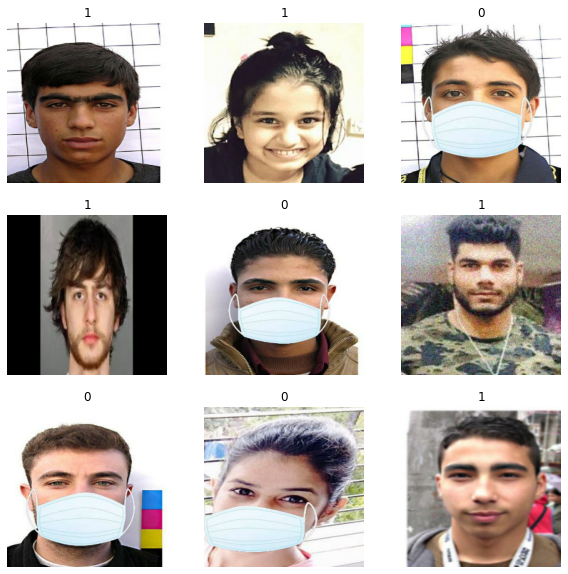

In [259]:
plt.figure(figsize=(10,10))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(int(labels[i]))
        plt.axis('off')

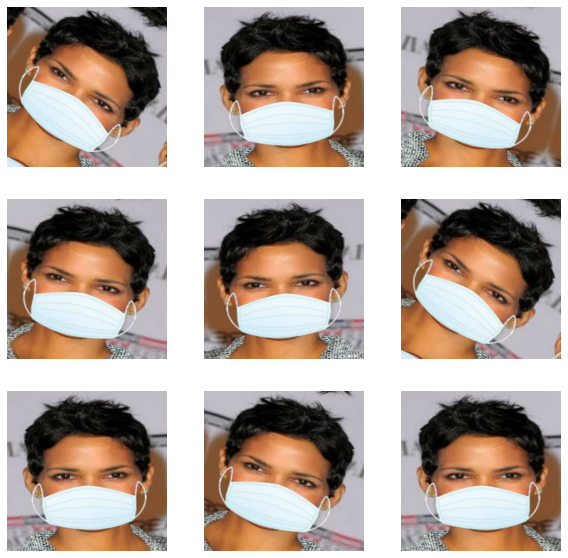

In [260]:
plt.figure(figsize=(10, 10))
for images, _ in dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3,3,i+1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis('off')
        

In [261]:
inputs = keras.Input(shape=(256,256,3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)

In [262]:
df_X = list()
df_y = list()
for a, b in dataset.take(1376).as_numpy_iterator():
    for c in a:
        df_X.append(a[0])
    for d in b:
        df_y.append(d)
    
print(len(df_X))
print(len(df_y))

1376
1376


In [263]:
df = pd.DataFrame(np.array(df_X).reshape(1376, -1))
df['y'] = np.array(df_y)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,196599,196600,196601,196602,196603,196604,196605,196606,196607,y
0,242.0,241.0,247.0,242.0,241.0,247.0,242.0,241.0,247.0,242.0,...,231.302734,232.302734,237.302734,232.0,232.636719,237.818359,232.0,231.0,237.0,0
1,242.0,241.0,247.0,242.0,241.0,247.0,242.0,241.0,247.0,242.0,...,231.302734,232.302734,237.302734,232.0,232.636719,237.818359,232.0,231.0,237.0,1
2,242.0,241.0,247.0,242.0,241.0,247.0,242.0,241.0,247.0,242.0,...,231.302734,232.302734,237.302734,232.0,232.636719,237.818359,232.0,231.0,237.0,0
3,242.0,241.0,247.0,242.0,241.0,247.0,242.0,241.0,247.0,242.0,...,231.302734,232.302734,237.302734,232.0,232.636719,237.818359,232.0,231.0,237.0,0
4,242.0,241.0,247.0,242.0,241.0,247.0,242.0,241.0,247.0,242.0,...,231.302734,232.302734,237.302734,232.0,232.636719,237.818359,232.0,231.0,237.0,1


In [264]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (1100, 196608)
Shape of X_test: (276, 196608)
Shape of y_train: (1100,)
Shape of y_test: (276,)


In [265]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [266]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

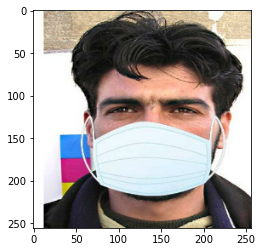

In [269]:
def show_image(array):
    array = array.reshape(256, 256, 3)
    array = array / 255.
    plt.imshow(array)
    plt.show()
    
show_image(X_train[0])

In [270]:
from keras.preprocessing.image import ImageDataGenerator

#datagen = ImageDataGenerator(
#        rotation_range=10, # rotation
#        width_shift_range=0.2, # horizontal shift
#        height_shift_range=0.2, # vertical shift
#        zoom_range=0.2, # zoom
#        horizontal_flip=True, # horizontal flip
#        brightness_range=[0.2,1.2]) # brightness
datagen = ImageDataGenerator(rescale=1. / 255)

batch_size = 32

X_train = X_train.reshape(-1, 256, 256, 3)
X_test = X_test.reshape(-1, 256, 256, 3)

training_data_generator = datagen.flow(X_train, y_train, batch_size=batch_size)
validation_data_generator = datagen.flow(X_test, y_test, batch_size=batch_size)

### 4. Design a Convolutional Neural Network (CNN) Model using AveragePooling2D, Flatten, Dense, and Dropout layers

In [276]:
from keras.applications.mobilenet_v2 import MobileNetV2

def model_1():
    model = Sequential()
    model.add(MobileNetV2(weights='imagenet', include_top=False, input_shape = (256, 256, 3)))
    #model.add(Conv2D(2, 3, activation='relu', input_shape = (256, 256, 3)))
    #model.add(AveragePooling2D(2, 2))
    #model.add(Conv2D(2, 3, activation='relu'))
    #model.add(AveragePooling2D(2, 2))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [279]:
model = model_1()

for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

early_stopping = EarlyStopping(patience=3)

step_size_train=training_data_generator.n//training_data_generator.batch_size
step_size_val=validation_data_generator.n//validation_data_generator.batch_size

#model.fit(X_train, y_train, 
#          epochs=10, 
#          validation_data=(X_test, y_test), 
#          callbacks=early_stopping,
#         validation_split=0.2)

training_history = model.fit_generator(training_data_generator, 
                    steps_per_epoch=step_size_train,
                   epochs=1,
                    callbacks=early_stopping,
                   validation_data=validation_data_generator,
                   validation_steps=step_size_val)

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 8, 8, 1280)        2257984   
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 1280)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 81920)             0         
_________________________________________________________________
dense_38 (Dense)             (None, 32)                2621472   
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 66        
Total params: 4,879,522
Trainable params: 4,845,410
Non-trainable params: 34,112
_________________________________________________________________
34/34 [==============================] - 258s 7s/step - loss: 2.1150 - accuracy: 0.4822 - val_loss: 0.69

In [303]:
from keras.preprocessing.image import ImageDataGenerator

#datagen = ImageDataGenerator(
#        rotation_range=10, # rotation
#        width_shift_range=0.2, # horizontal shift
#        height_shift_range=0.2, # vertical shift
#        zoom_range=0.2, # zoom
#        horizontal_flip=True, # horizontal flip
#        brightness_range=[0.2,1.2]) # brightness
#datagen = ImageDataGenerator(rescale=1. / 255)

train_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)

training_generator = train_datagen.flow_from_directory(data_directory,
                                                target_size=(224,224),
                                                color_mode='rgb',
                                                batch_size=32,
                                                class_mode='categorical',
                                                subset='training',
                                                shuffle=True)

validation_generator = train_datagen.flow_from_directory(data_directory,
                                                target_size=(224,224),
                                                color_mode='rgb',
                                                batch_size=32,
                                                class_mode='categorical',
                                                subset='validation',
                                                shuffle=True)

Found 1101 images belonging to 2 classes.
Found 275 images belonging to 2 classes.


### 5. Compile the Model using Adam optimizer, Binary Crossentropy loss, and accuracy metric functions

In [301]:
from keras.applications.mobilenet_v2 import MobileNetV2

def model_2():
    model = Sequential()
    model.add(MobileNetV2(weights='imagenet', include_top=False, input_shape = (224, 224, 3)))
    #model.add(Conv2D(2, 3, activation='relu', input_shape = (256, 256, 3)))
    #model.add(AveragePooling2D(2, 2))
    #model.add(Conv2D(2, 3, activation='relu'))
    #model.add(AveragePooling2D(2, 2))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    #model.summary()
    return model

### 6. Training for 5 epochs only since it is taking lot of time

In [306]:
model = model_2()

train_step_size = training_generator.samples//training_generator.batch_size
validation_step_size = validation_generator.samples//validation_generator.batch_size
training_history = model.fit_generator(training_generator,
                                       validation_data=validation_generator,
                                       steps_per_epoch=train_step_size,
                                       epochs=5, 
                                       validation_steps=validation_step_size, 
                                       callbacks=early_stopping)

Epoch 1/5
34/34 [==============================] - 179s 5s/step - loss: 1.0463 - accuracy: 0.9196 - val_loss: 0.3487 - val_accuracy: 0.9844
Epoch 2/5
34/34 [==============================] - 180s 5s/step - loss: 0.0057 - accuracy: 0.9972 - val_loss: 0.2769 - val_accuracy: 0.9922
Epoch 3/5
34/34 [==============================] - 185s 5s/step - loss: 0.0855 - accuracy: 0.9794 - val_loss: 31.8322 - val_accuracy: 0.5078
Epoch 4/5
34/34 [==============================] - 213s 6s/step - loss: 0.0369 - accuracy: 0.9878 - val_loss: 8.7618 - val_accuracy: 0.8164
Epoch 5/5
34/34 [==============================] - 181s 5s/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 5.0870 - val_accuracy: 0.8320


In [310]:
history = training_history.history
loss = history['loss']
accuracy = history['accuracy']

### 7.a Make a plot for the loss function to visualize the change in the loss at every epoch

<function matplotlib.pyplot.show(close=None, block=None)>

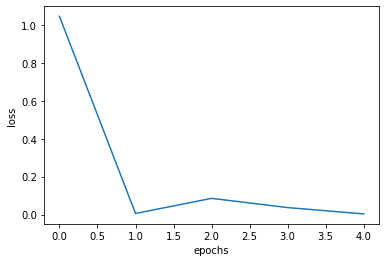

In [311]:
plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show

### 7.b Make a plot for the accuracy metric to visualize the accuracy at every epoch

<function matplotlib.pyplot.show(close=None, block=None)>

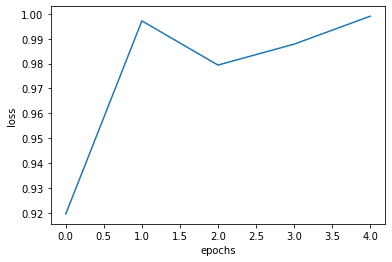

In [312]:
plt.plot(accuracy)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show

### 8. Evaluate the Model using model.evaluate method

In [317]:
#help(model.evaluate)
result = model.evaluate_generator(validation_generator)
result

[5.224694728851318, 0.8290908932685852]

### 9. Save the Entire Model using model.save

In [319]:
model.save('mask_identifier.h5')

### Now that you have trained the model, test it using a webcam using OpenCV, and detect the Face Masks in real-time

I have moved this code to anothe file Scenario_1_WebCam.ipynb